### 1. 데이터 전처리 및 정제


- 키워드가 존재하지 않는 웹소설 존재 or 키워드 추출이 제대로 되지 않은 웹소설(일부)
- 후자의 경우 직접 기입해줌

In [ ]:
import pandas as pd

csv_file_path = '/content/df_with_keywords.csv'

df = pd.read_csv(csv_file_path)


In [ ]:
df.head()

,Text,키워드
0,일코하는황녀님,"로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남,..."
1,남궁세가손녀딸의귀환,"로맨스판타지, 먼치킨, 환생물, 무협물, 가족물"
2,신성력은돈으로사겠습니다,"로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀, ..."
3,사랑받는막내는처음이라,"로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능력..."
4,망나니악녀가돌아왔다,"로맨스판타지, 왕족/귀족, 악녀, 드라마"


In [ ]:
#키워드 크롤링이 되지 않은 건에 대해 직접 기입해줌
genres_str = """#로맨스판타지
#빙의물
#첫사랑
#운명
#능글남
#카리스마남
#유혹남
#계략남
#외유내강
#사이다녀
#철벽녀
#신분차이
#드라마
#애잔물"""

genres_str_cleaned = ', '.join(genre.strip("#'") for genre in genres_str.split('\n'))

print(genres_str_cleaned)


로맨스판타지, 빙의물, 첫사랑, 운명, 능글남, 카리스마남, 유혹남, 계략남, 외유내강, 사이다녀, 철벽녀, 신분차이, 드라마, 애잔물


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    300 non-null    object
 1   키워드     192 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


키워드가 있는 행(192개)와 키워드가 없는 행(108개)를 우선 분리

In [ ]:
df_with_keywords = df[df['키워드'].notnull()]
df_without_keywords = df[df['키워드'].isnull()]

print("키워드가 있는 행:")
print(df_with_keywords)

print("\n키워드가 없는 행:")
print(df_without_keywords)

키워드가 있는 행:
                Text                                                키워드
0            일코하는황녀님  로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남,...
1         남궁세가손녀딸의귀환                         로맨스판타지, 먼치킨, 환생물, 무협물, 가족물
2       신성력은돈으로사겠습니다  로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀, ...
3        사랑받는막내는처음이라  로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능력...
4         망나니악녀가돌아왔다                             로맨스판타지, 왕족/귀족, 악녀, 드라마
..               ...                                                ...
288         악당만취급합니다                        로맨스판타지, 집착남, 직진남, 능력녀, 사이다녀
289       대공가에입양된성녀님                    로맨스판타지, 회귀물, 복수물, 성장물, 육아물, 힐링물
292           모두의황녀님                         로맨스판타지, 힐링물, 성장물, 육아물, 역하렘
293        망나니의누님이시다  로맨스판타지, 타임슬립, 오해물, 복수물, 회귀물, 가상시대물, 여주판타지, 첫사랑...
298  상냥한남자주인공의가면을벗기면                남장여자물, 빙의물, 남장여자, 소유욕/독점욕, 직진남, 능력녀

[192 rows x 2 columns]

키워드가 없는 행:
                  Text  키워드
18           폭군의간신이되었다  NaN
23   파혼한영애는엔딩외엔집착하지않는다  NaN
34   

df_with_keywords 데이터프레임에 대해 키워드 EDA 해보기

1. 키워드 -> 워드클라우드로 대체적으로 어느 키워드가 지배적인지 확인

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 코랩 환경에서는 꼭 cache rm 해줘야 폰트가 제대로 작동한다!


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12


In [ ]:
# text = ' '.join(df_with_keywords['키워드'])
# text

'로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남, 걸크러쉬, 짝사랑녀, 로맨틱코미디, 권선징악 로맨스판타지, 먼치킨, 환생물, 무협물, 가족물 로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀, 외유내강, 걸크러쉬, 직진녀, 권선징악 로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능력녀, 무심녀, 걸크러쉬, 상처녀, 소꿉친구 로맨스판타지, 왕족/귀족, 악녀, 드라마 로맨스판타지, 성장물, 빙의물, 무협물, 차원이동, 시한부, 다정남, 연하남, 능력남, 능력녀, 자상녀, 다정녀, 치유물, 힐링물 로맨스판타지, 육아물, 먼치킨, 수인물, 다정남, 상처남, 능력녀, 엉뚱발랄녀, 걸크러쉬, 사이다녀, 계약관계, 로맨틱코미디, 치유물, 개그물, 권선징악 로맨스판타지, 육아물, 성장물, 먼치킨, 소유욕/독점욕, 집착남, 능력녀, 계략녀, 외유내강, 소꿉친구, 달달물, 치유물, 힐링물 로맨스판타지, 육아물, 가족후회물, 환생물, 복수물, 초월적존재, 후회남, 존댓말남, 조신남, 동정남, 상처녀, 재벌녀, 힐링물, 권선징악 로맨스판타지, 육아물, 성장물, 가족물, 빙의물, 힐링물 로맨스판타지, 왕족/귀족, 시월드, 정략결혼, 능력남, 직진남, 철벽남, 존댓말남, 로맨틱코미디, 능력녀, 직진녀, 유혹녀, 외유내강, 엉뚱발랄녀 로맨스판타지, 무협물, 걸크러쉬, 능력녀, 가족물, 여주판타지, 운명, 계략남, 능력남, 계략녀, 계약관계, 드라마 로맨스판타지, 빙의물, 중세물, 가상시대물, 순정남, 나쁜남자, 능글남, 유혹남, 대형견남, 직진남, 능력녀, 걸크러쉬, 힐링물, 개그물, 인외존재 치유물, 상처녀, 순진녀, 다정녀, 상처남, 다정남, 가족물, 육아물, 조직/암흑가, 성장물, 로맨스판타지 로맨스판타지, 육아물, 성장물, 학원물, 가족물, 운명, 천재, 왕족/귀족, 순정남, 능력녀, 다정녀, 삼각관계, 잔잔물, 힐링물, 권선징악 로맨스판타지, 첫사랑, 정략결혼, 개그물, 로맨틱코

In [ ]:

keyword_counts = Counter(result_text.split(', '))

sorted_keyword_counts = dict(sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True))

for keyword, count in sorted_keyword_counts.items():
    print(f'{keyword}: {count}')


,,환생물,,짝사랑,,운명,,존댓말남,,집착남,,소유욕/독점욕,,상처남,,걸크러쉬,,짝사랑녀,,,,권선징악,,,먼치킨,,환생물,,무협물,,가족물,,,차원이동물,,환생물,,능글남,,다정남,,유혹남,,존댓말남,,능력녀,,외유내강,,걸크러쉬,,직진녀,,권선징악,,,육아물,,먼치킨,,환생물,,시한부,,집착남,,대형견남,,직진남,,능력녀,,무심녀,,걸크러쉬,,상처녀,,소꿉친구,,,왕족/귀족,,악녀,,드라마,,,성장물,,빙의물,,무협물,,차원이동,,시한부,,다정남,,연하남,,능력남,,능력녀,,자상녀,,다정녀,,치유물,,힐링물,,,육아물,,먼치킨,,수인물,,다정남,,상처남,,능력녀,,엉뚱발랄녀,,걸크러쉬,,사이다녀,,계약관계,,,,치유물,,개그물,,권선징악,,,육아물,,성장물,,먼치킨,,소유욕/독점욕,,집착남,,능력녀,,계략녀,,외유내강,,소꿉친구,,달달물,,치유물,,힐링물,,,육아물,,가족후회물,,환생물,,복수물,,초월적존재,,후회남,,존댓말남,,조신남,,동정남,,상처녀,,재벌녀,,힐링물,,권선징악,,,육아물,,성장물,,가족물,,빙의물,,힐링물,,,왕족/귀족,,시월드,,정략결혼,,능력남,,직진남,,철벽남,,존댓말남,,,,능력녀,,직진녀,,유혹녀,,외유내강,,엉뚱발랄녀,,,무협물,,걸크러쉬,,능력녀,,가족물,,여주판타지,,운명,,계략남,,능력남,,계략녀,,계약관계,,드라마,,,빙의물,,중세물,,가상시대물,,순정남,,나쁜남자,,능글남,,유혹남,,대형견남,,직진남,,능력녀,,걸크러쉬,,힐링물,,개그물,,인외존재,치유물,,상처녀,,순진녀,,다정녀,,상처남,,다정남,,가족물,,육아물,,조직/암흑가,,성장물,,,,,육아물,,성장물,,학원물,,가족물,,운명,,천재,,왕족/귀족,,순정남,,능력녀,,다정녀,,삼각관계,,잔잔물,,힐링물,,권선징악,,,첫사랑,,정략결혼,,개그물,,,,외유내강,,엉뚱발랄녀,,능력녀,,존댓말남,,다정남,,집착남,,능력남,,소유욕/독점욕,,,집착남,,능력녀,,기억상실,,,육아물,,성장물,,회귀물,,애교녀,,다정녀,,순진녀,,능력녀,,외유내강,,치유물,,힐링물,,

In [ ]:
df

,Text,키워드
0,일코하는황녀님,"로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남,..."
1,남궁세가손녀딸의귀환,"로맨스판타지, 먼치킨, 환생물, 무협물, 가족물"
2,신성력은돈으로사겠습니다,"로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀, ..."
3,사랑받는막내는처음이라,"로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능력..."
4,망나니악녀가돌아왔다,"로맨스판타지, 왕족/귀족, 악녀, 드라마"
...,...,...
187,악당만취급합니다,"로맨스판타지, 집착남, 직진남, 능력녀, 사이다녀"
188,대공가에입양된성녀님,"로맨스판타지, 회귀물, 복수물, 성장물, 육아물, 힐링물"
189,모두의황녀님,"로맨스판타지, 힐링물, 성장물, 육아물, 역하렘"
190,망나니의누님이시다,"로맨스판타지, 타임슬립, 오해물, 복수물, 회귀물, 가상시대물, 여주판타지, 첫사랑..."


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def extract_keywords(row):
    return str(row['키워드']).split(', ')

df['키워드 리스트'] = df.apply(extract_keywords, axis=1)

df

,Text,키워드,키워드 리스트
0,일코하는황녀님,"로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남,...","[로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남..."
1,남궁세가손녀딸의귀환,"로맨스판타지, 먼치킨, 환생물, 무협물, 가족물","[로맨스판타지, 먼치킨, 환생물, 무협물, 가족물]"
2,신성력은돈으로사겠습니다,"로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀, ...","[로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀,..."
3,사랑받는막내는처음이라,"로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능력...","[로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능..."
4,망나니악녀가돌아왔다,"로맨스판타지, 왕족/귀족, 악녀, 드라마","[로맨스판타지, 왕족/귀족, 악녀, 드라마]"
...,...,...,...
187,악당만취급합니다,"로맨스판타지, 집착남, 직진남, 능력녀, 사이다녀","[로맨스판타지, 집착남, 직진남, 능력녀, 사이다녀]"
188,대공가에입양된성녀님,"로맨스판타지, 회귀물, 복수물, 성장물, 육아물, 힐링물","[로맨스판타지, 회귀물, 복수물, 성장물, 육아물, 힐링물]"
189,모두의황녀님,"로맨스판타지, 힐링물, 성장물, 육아물, 역하렘","[로맨스판타지, 힐링물, 성장물, 육아물, 역하렘]"
190,망나니의누님이시다,"로맨스판타지, 타임슬립, 오해물, 복수물, 회귀물, 가상시대물, 여주판타지, 첫사랑...","[로맨스판타지, 타임슬립, 오해물, 복수물, 회귀물, 가상시대물, 여주판타지, 첫사..."


In [ ]:
df['키워드 리스트']

0      [로맨스판타지, 환생물, 짝사랑, 운명, 존댓말남, 집착남, 소유욕/독점욕, 상처남...
1                           [로맨스판타지, 먼치킨, 환생물, 무협물, 가족물]
2      [로맨스판타지, 차원이동물, 환생물, 능글남, 다정남, 유혹남, 존댓말남, 능력녀,...
3      [로맨스판타지, 육아물, 먼치킨, 환생물, 시한부, 집착남, 대형견남, 직진남, 능...
4                               [로맨스판타지, 왕족/귀족, 악녀, 드라마]
                             ...                        
187                        [로맨스판타지, 집착남, 직진남, 능력녀, 사이다녀]
188                    [로맨스판타지, 회귀물, 복수물, 성장물, 육아물, 힐링물]
189                         [로맨스판타지, 힐링물, 성장물, 육아물, 역하렘]
190    [로맨스판타지, 타임슬립, 오해물, 복수물, 회귀물, 가상시대물, 여주판타지, 첫사...
191                [남장여자물, 빙의물, 남장여자, 소유욕/독점욕, 직진남, 능력녀]
Name: 키워드 리스트, Length: 192, dtype: object

In [ ]:
keyword_counts = {}
for keyword_list in df['키워드 리스트']:
    for keyword in keyword_list:
        if keyword in keyword_counts:
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1

keyword_counts

{'로맨스판타지': 176,
 '환생물': 30,
 '짝사랑': 9,
 '운명': 31,
 '존댓말남': 22,
 '집착남': 47,
 '소유욕/독점욕': 37,
 '상처남': 31,
 '걸크러쉬': 54,
 '짝사랑녀': 4,
 '로맨틱코미디': 50,
 '권선징악': 40,
 '먼치킨': 19,
 '무협물': 9,
 '가족물': 25,
 '차원이동물': 7,
 '능글남': 18,
 '다정남': 58,
 '유혹남': 15,
 '능력녀': 128,
 '외유내강': 40,
 '직진녀': 16,
 '육아물': 48,
 '시한부': 7,
 '대형견남': 20,
 '직진남': 28,
 '무심녀': 22,
 '상처녀': 26,
 '소꿉친구': 10,
 '왕족/귀족': 45,
 '악녀': 7,
 '드라마': 25,
 '성장물': 66,
 '빙의물': 58,
 '차원이동': 5,
 '연하남': 7,
 '능력남': 61,
 '자상녀': 11,
 '다정녀': 25,
 '치유물': 23,
 '힐링물': 39,
 '수인물': 11,
 '엉뚱발랄녀': 41,
 '사이다녀': 47,
 '계약관계': 29,
 '개그물': 24,
 '계략녀': 30,
 '달달물': 14,
 '가족후회물': 10,
 '복수물': 24,
 '초월적존재': 15,
 '후회남': 14,
 '조신남': 7,
 '동정남': 7,
 '재벌녀': 3,
 '시월드': 4,
 '정략결혼': 15,
 '철벽남': 3,
 '유혹녀': 3,
 '여주판타지': 23,
 '계략남': 17,
 '중세물': 4,
 '가상시대물': 16,
 '순정남': 42,
 '나쁜남자': 3,
 '인외존재': 7,
 '순진녀': 11,
 '조직/암흑가': 2,
 '학원물': 5,
 '천재': 9,
 '삼각관계': 4,
 '잔잔물': 5,
 '첫사랑': 25,
 '기억상실': 5,
 '회귀물': 34,
 '애교녀': 6,
 '애잔물': 5,
 '우연한만남': 4,
 '궁정로맨스': 4,
 '냉정남': 11,
 '냉정녀': 3,
 '신분차이': 10

In [ ]:
sorted_keyword_counts = dict(sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True))
sorted_keyword_counts

{'로맨스판타지': 176,
 '능력녀': 128,
 '성장물': 66,
 '능력남': 61,
 '다정남': 58,
 '빙의물': 58,
 '걸크러쉬': 54,
 '로맨틱코미디': 50,
 '육아물': 48,
 '집착남': 47,
 '사이다녀': 47,
 '왕족/귀족': 45,
 '순정남': 42,
 '엉뚱발랄녀': 41,
 '권선징악': 40,
 '외유내강': 40,
 '힐링물': 39,
 '소유욕/독점욕': 37,
 '회귀물': 34,
 '운명': 31,
 '상처남': 31,
 '환생물': 30,
 '계략녀': 30,
 '계약관계': 29,
 '직진남': 28,
 '상처녀': 26,
 '가족물': 25,
 '드라마': 25,
 '다정녀': 25,
 '첫사랑': 25,
 '개그물': 24,
 '복수물': 24,
 '치유물': 23,
 '여주판타지': 23,
 '존댓말남': 22,
 '무심녀': 22,
 '역하렘': 22,
 '까칠남': 22,
 '대형견남': 20,
 '먼치킨': 19,
 '짝사랑남': 19,
 '능글남': 18,
 '계략남': 17,
 '털털녀': 17,
 '직진녀': 16,
 '가상시대물': 16,
 '카리스마남': 16,
 '유혹남': 15,
 '초월적존재': 15,
 '정략결혼': 15,
 '달달물': 14,
 '후회남': 14,
 '라이벌/앙숙': 14,
 '친구>연인': 14,
 '착각물': 13,
 '재회물': 12,
 '자상녀': 11,
 '수인물': 11,
 '순진녀': 11,
 '냉정남': 11,
 '뇌섹녀': 11,
 '소꿉친구': 10,
 '가족후회물': 10,
 '신분차이': 10,
 '오해물': 10,
 '짝사랑': 9,
 '무협물': 9,
 '천재': 9,
 '오만남': 9,
 '츤데레남': 9,
 '까칠녀': 8,
 '쌍방삽질': 8,
 '도도녀': 8,
 '차원이동물': 7,
 '시한부': 7,
 '악녀': 7,
 '연하남': 7,
 '조신남': 7,
 '동정남': 7,
 '인외존재': 7,
 '철벽녀': 7,


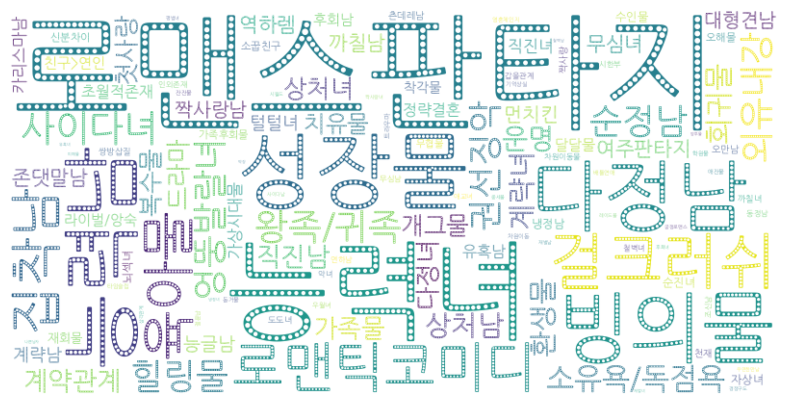

In [ ]:

wordcloud = WordCloud(font_path = font_path, width=800, height=400, background_color='white').generate_from_frequencies(sorted_keyword_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()